# Sports Equipment Recognizer
The goal of this project is to classify 20 different types of sports equipment popular around the world. The types are following: <br/>


1.  Football
2.  Basketball ball
3.  Tennis Racket
4.  Baseball Bat
5.  Cricket Bat
6.  Hockey Stick
7.  Volleyball ball
8.  Badminton Shuttlecock
9.  Table Tennis Paddle
10.  Rugby Ball
11. Golf ball
12. Bowling Ball
13. Skateboard
14. Ski Poles
15. Ice Skates
16. Frisbee disc
17. Carrom board
18. Archery Bow
19. Boxing Gloves
20. Chessboard





# Setting Up Necessary Things

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.5/234.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.7 MB/s eta 0:00:00


In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Sports Equipment

/content/drive/My Drive/Sports Equipment


# Download Images from Browser

We are going to use **DuckDuckGo Image Search**. <br/>

In [ ]:
equipment_labels = [
    "Soccer ball",
    "Basketball ball",
    "Tennis Racket",
    "Baseball Bat",
    "Cricket Bat",
    "Hockey Stick",
    "Volleyball ball",
    "Badminton Shuttlecock",
    "Table Tennis Paddle",
    "Rugby Ball",
    "Golf ball",
    "Bowling Ball",
    "Skateboard",
    "Ski Poles",
    "Ice Skates",
    "Frisbee disc",
    "Carrom board",
    "Archery Bow",
    "Boxing Gloves",
    "Chessboard"

]
len(equipment_labels)

20

In [ ]:
images = search_images_ddg(equipment_labels[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://thumbs.dreamstime.com/b/vintage-classic-historic-soccer-ball-football-world-cup-vintage-classic-historic-soccer-ball-football-world-cup-leather-254453130.jpg'

In [ ]:
dest = "Football.jpg"
download_url(images[0], dest, show_progress=False)

Path('Football.jpg')

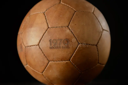

In [ ]:
image = Image.open(dest)
image.to_thumb(128, 128)

## Download all of them

In [ ]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for equipment_type in equipment_labels:

  dest = f"{data_path}/{equipment_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    sport_image_urls = search_images_ddg(equipment_type, max_images=300)
    download_images(dest, urls = sport_image_urls)

  except:
    continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#5430) [Path('data/Soccer ball/e759493b-2883-4a7d-9988-376a6bbd3adf.png'),Path('data/Soccer ball/13ae9b7e-af79-42a6-aed9-4a2e13cb9a71.jpg'),Path('data/Soccer ball/40d7af73-3356-4b9f-a457-043f8ecb363c.jpg'),Path('data/Soccer ball/f80b00a1-93dd-4b8a-8524-282e5d22297e.jpg'),Path('data/Soccer ball/bfc86668-4545-432f-bad3-7815640c4075.jpg'),Path('data/Soccer ball/1df263d7-ec30-464c-a16d-3147f64cdd87.png'),Path('data/Soccer ball/32765008-a2e6-4dac-9865-16c307a918af.jpg'),Path('data/Soccer ball/eb3a11e4-bc90-4f21-be28-7106b7b192cc.jpg'),Path('data/Soccer ball/414a0768-b583-4487-a9fb-a5e7a625c944.jpg'),Path('data/Soccer ball/e3dd21a5-cb76-4183-95d1-99f1ee7c222e.jpg')...]

In [ ]:
failed = verify_images(image_counts)
failed

(#410) [Path('data/Soccer ball/13ae9b7e-af79-42a6-aed9-4a2e13cb9a71.jpg'),Path('data/Soccer ball/40d7af73-3356-4b9f-a457-043f8ecb363c.jpg'),Path('data/Soccer ball/4bcfa0a2-14c6-4b22-89a7-c57271c9cb6f.jpg'),Path('data/Soccer ball/197b6b58-dde9-4112-a602-a88dee21ee29.jpg'),Path('data/Soccer ball/d5ea5b2f-0133-4165-a826-778d999c2fe8.jpg'),Path('data/Soccer ball/cd0429b5-3fc8-4a86-9c80-a0077b4bdd3a.jpg'),Path('data/Soccer ball/1c9779f7-cb11-445f-9cc6-538420831b97.jpg'),Path('data/Soccer ball/4ef25d7a-8cea-4d9c-bac7-ad012cdbd095.jpg'),Path('data/Soccer ball/717e179a-1bc2-4ffc-a28b-505b9c8e56a1.jpg'),Path('data/Soccer ball/64ab67ab-8889-4b4c-854e-c6a397796b43.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#410) [None,None,None,None,None,None,None,None,None,None...]